In [1]:
import numpy as np

In [2]:
# Code to solve e^{x}+x=0:

x0 = -0.5 # Initial guess

# define our functional
def f(x):
    return np.exp(x)+x

# define its derivative
def df(x):
    return np.exp(x)+1

tol = 1.e-6 # Define a tolerance within which we wish to compute the solution

# Define a maximum number of iterations. This is preferable over a while
# condition since it ensures we don't get stuck in an infinite loop!
nmax = 1000

# Compute the root
for it in range(nmax):
    print('Executing iteration', it)
    x0 = x0-f(x0)/df(x0) # Update our guess
    if f(x0) < tol: # If we meet the required tolerance, we're done!
        break

print(x0)

# Check
print(f(x0))

Executing iteration 0
Executing iteration 1
-0.5671431650348622
1.964804717813351e-07


In [3]:
# Code to find the minimum of e^{x}-x:

x0 = -0.5 # Initial guess

# define the derivative
def df(x):
    return np.exp(x)-1

# And its 2nd derivative
def d2f(x):
    return np.exp(x)

tol = 1.e-6 # Define a tolerance within which we wish to compute the solution

# Define a maximum number of iterations. This is preferable over a while
# condition since it ensures we don't get stuck in an infinite loop!
nmax = 1000

# Minimize the function
for it in range(nmax):
    print('Executing iteration', it)
    x0 = x0-df(x0)/d2f(x0) # Update our guess
    if df(x0) < tol: # If we meet the required tolerance, we're done!
        break

print(x0)

# Check
print(df(x0))

Executing iteration 0
Executing iteration 1
Executing iteration 2
Executing iteration 3
1.5263785710633443e-09
1.5263785790864404e-09


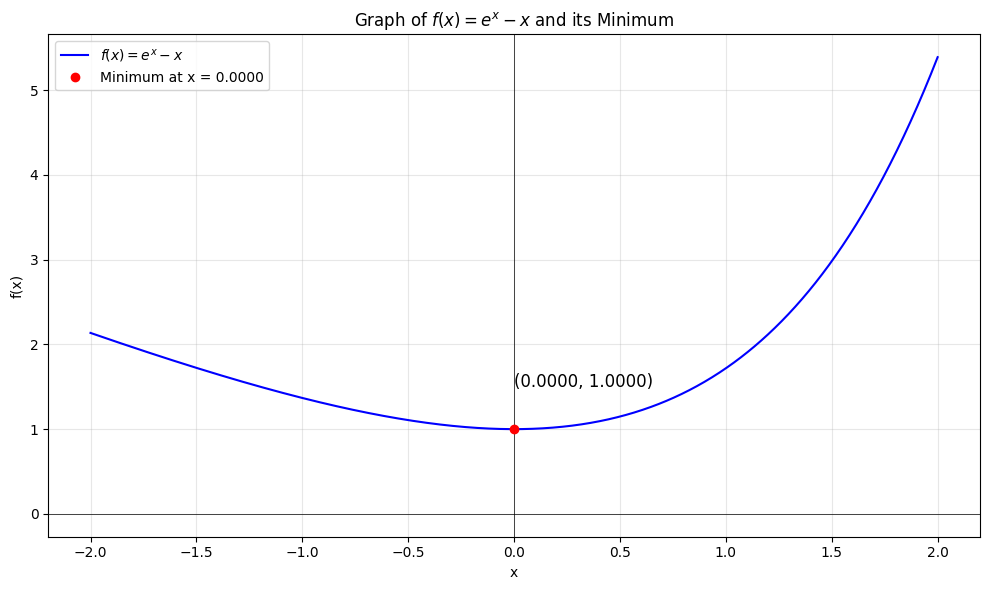

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数及其导数和二阶导数
def f(x):
    return np.exp(x) - x

def df(x):
    return np.exp(x) - 1

def ddf(x):
    return np.exp(x)

# 牛顿-拉夫森法找到最小值
tol = 1.e-6
x0 = 0
max_iter = 100

for i in range(max_iter):
    x0 = x0 - df(x0) / ddf(x0)
    if abs(df(x0)) < tol:
        break

# 最小值点和对应的函数值
x_min = x0
y_min = f(x_min)

# 绘制函数曲线
x_vals = np.linspace(-2, 2, 1000)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label=r"$f(x) = e^x - x$", color='blue')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)

# 标注最小值点
plt.plot(x_min, y_min, 'ro', label=f"Minimum at x = {x_min:.4f}")
plt.text(x_min, y_min + 0.5, f"({x_min:.4f}, {y_min:.4f})", fontsize=12)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graph of $f(x) = e^x - x$ and its Minimum')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
# Code to minimize $f(x,y)=(x-2)^4+(y-3)^4$

x0 = np.array([5., 5.]) # Initial guess

# define the functional
def f(x, y):
    return (x-2)**4+(y-3)**4 

# define the derivative
def df(x, y):
    return np.array([4*(x-2)**3, 4*(y-3)**3])

# And its 2nd derivative
def H(x, y):
    return np.array([[12*(x-2)**2, 0], [0, 12*(y-3)**2]])

tol = 1.e-6 # Define a tolerance within which we wish to compute the solution

# Define a maximum number of iterations. This is preferable over a while
# condition since it ensures we don't get stuck in an infinite loop!
nmax = 1000

# Minimize the function
for it in range(nmax):
    print('Executing iteration', it)
    Hi = np.linalg.inv(H(x0[0], x0[1])) # Inverse of the Hessian
    grad = df(x0[0], x0[1]) # Grad of the function
    x0 = x0-np.matmul(Hi, grad) # Update our guess
    if np.linalg.norm(df(x0[0], x0[1])) < tol: # If we meet the required tolerance, we're done!
        break

print(x0)

# Check
print(df(x0[0], x0[1]))

Executing iteration 0
Executing iteration 1
Executing iteration 2
Executing iteration 3
Executing iteration 4
Executing iteration 5
Executing iteration 6
Executing iteration 7
Executing iteration 8
Executing iteration 9
Executing iteration 10
Executing iteration 11
Executing iteration 12
Executing iteration 13
Executing iteration 14
Executing iteration 15
[2.00456732 3.00304488]
[3.81103837e-07 1.12919655e-07]


In [5]:
# Code to minimize $f(x,y)=(x-2)^2+(y-3)^2$

x0 = np.array([10., 10.]) # Initial guess

# define the functional
def f(x, y):
    return (x-2)**2+(y-3)**2

# define the derivative
def df(x, y):
    return np.array([2*(x-2), 2*(y-3)])

# And its 2nd derivative
def H(x, y):
    return np.array([[2, 0], [0, 2]])

tol = 1.e-6 # Define a tolerance within which we wish to compute the solution

# Define a maximum number of iterations. This is preferable over a while
# condition since it ensures we don't get stuck in an infinite loop!
nmax = 1000

# Minimize the function
for it in range(nmax):
    print('Executing iteration', it)
    Hi = np.linalg.inv(H(x0[0], x0[1])) # Inverse of the Hessian
    grad = df(x0[0], x0[1]) # Grad of the function
    x0 = x0-np.matmul(Hi, grad) # Update our guess
    if np.linalg.norm(df(x0[0], x0[1])) < tol: # If we meet the required tolerance, we're done!
        break

print(x0)

# Check
print(df(x0[0], x0[1]))

Executing iteration 0
[2. 3.]
[0. 0.]


Notice that, regardless of initial guess, the algorithm takes only 1 iteration to converge on the correct solution. That is, the algorithm is exact!

To understand why, we must go back to the Taylor series. Recall that we must re-arrange

\begin{equation}
  \frac{\partial f}{\partial \mathbf{m}}\biggr|_{\mathbf{m}=\mathbf{m}_0}+\frac{\partial^2f}{\partial \mathbf{m}^2}\biggr|_{\mathbf{m}=\mathbf{m}_0}\delta\mathbf{m}+\mathcal{O}(\delta\mathbf{m}^2)=0.
\end{equation}

in terms of $\delta\mathbf{m}$ (where in this example $\mathbf{m}=(x, y)$). However, notice that since our Hessian in this case is constant (it has no $x$ or $y$ dependence) any higher order derivatives of it will be 0. Hence, in this case the terms $\mathcal{O}(\delta\mathbf{m}^2)$ will be exactly 0 and the method will be exact!

This it true for any case in which the Hessian is a constant (invertible) matrix - the algorithm will converge to the exact solution after a single iteration.

# 三维牛顿

In [31]:
import numpy as np

# Initial guess (三维初始点)
x0 = np.array([5., 5., 5.])

# 定义函数：三维
def f(x, y, z):
    return (x-2)**4 + (y-3)**4 + (z-1)**4

# 一阶导数（梯度）
def df(x, y, z):
    return np.array([
        4 * (x - 2)**3,
        4 * (y - 3)**3,
        4 * (z - 1)**3
    ])

# 二阶导数矩阵（Hessian）
def H(x, y, z):
    return np.array([
        [12 * (x - 2)**2, 0, 0],
        [0, 12 * (y - 3)**2, 0],
        [0, 0, 12 * (z - 1)**2]
    ])

tol = 1.e-6  # 允许误差
nmax = 1000  # 最大迭代次数

# 执行牛顿法
for it in range(nmax):
    print(f"Iteration {it}: x0 = {x0}")
    
    # 计算 Hessian 矩阵的逆
    Hi = np.linalg.inv(H(x0[0], x0[1], x0[2]))  
    # 计算梯度
    grad = df(x0[0], x0[1], x0[2])
    # 更新参数
    x0 = x0 - np.matmul(Hi, grad)
    
    # 检查停止条件
    if np.linalg.norm(df(x0[0], x0[1], x0[2])) < tol:
        break

print("\nOptimized coordinates:", x0)
print("Gradient at minimum:", df(x0[0], x0[1], x0[2]))
print("Objective function value at minimum:", f(x0[0], x0[1], x0[2]))

Iteration 0: x0 = [5. 5. 5.]
Iteration 1: x0 = [4.         4.33333333 3.66666667]
Iteration 2: x0 = [3.33333333 3.88888889 2.77777778]
Iteration 3: x0 = [2.88888889 3.59259259 2.18518519]
Iteration 4: x0 = [2.59259259 3.39506173 1.79012346]
Iteration 5: x0 = [2.39506173 3.26337449 1.52674897]
Iteration 6: x0 = [2.26337449 3.17558299 1.35116598]
Iteration 7: x0 = [2.17558299 3.11705533 1.23411065]
Iteration 8: x0 = [2.11705533 3.07803688 1.15607377]
Iteration 9: x0 = [2.07803688 3.05202459 1.10404918]
Iteration 10: x0 = [2.05202459 3.03468306 1.06936612]
Iteration 11: x0 = [2.03468306 3.02312204 1.04624408]
Iteration 12: x0 = [2.02312204 3.01541469 1.03082939]
Iteration 13: x0 = [2.01541469 3.01027646 1.02055292]
Iteration 14: x0 = [2.01027646 3.00685097 1.01370195]
Iteration 15: x0 = [2.00685097 3.00456732 1.00913463]

Optimized coordinates: [2.00456732 3.00304488 1.00608976]
Gradient at minimum: [3.81103837e-07 1.12919655e-07 9.03357242e-07]
Objective function value at minimum: 1.8964

In [51]:
import numpy as np

# Initial guess (三维初始点)
x0 = np.array([5., 5., 5.])

# 定义函数：三维
def f(x, y, z):
    return (x-2)**4 + (y-3)**4 + (z-1)**4

# 一阶导数（梯度）
def df(x, y, z):
    return np.array([
        4 * (x - 2)**3,
        4 * (y - 3)**3,
        4 * (z - 1)**3
    ])
alpha = 0.02
# x0 = np.array([0., 0.])
iteration=  250000
for i in range(iteration):
    print('iteration', i)
    # H = np.linalg.inv(d2f(x0[0], x0[1], x0[2]))
    grad = df(x0[0], x0[1], x0[2])
    x0 = x0 - (alpha * grad)
    if np.linalg.norm(df(x0[0], x0[1], x0[2])) < 1.e-6:
        break
print(x0)
print(df(x0[0], x0[1], x0[2]))

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration

## gradient desent

In [29]:
import scipy.linalg as sl
def f(x, y):
    return(x-2)**4 + (y-3)**4
def df(x, y):
    return np.array([4*(x-2)**3, 4*(y-3)**3])
def d2f(x, y):
    return np.array([[12*(x-2)**2, 0], 
                    [0, 12*(y-3)**2]])
tot = 1.e-6
alpha = 0.05
x0 = np.array([0., 0.])
iteration=  100000
for i in range(iteration):
    print('iteration', i)
    H = np.linalg.inv(d2f(x0[0], x0[1]))
    grad = df(x0[0], x0[1])
    x0 = x0 - (alpha * grad)
    if np.linalg.norm(df(x0[0], x0[1])) < tot:
        break
print(x0)
print(df(x0[0], x0[1]))

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration

In [30]:
import scipy.linalg as sl
def f(x, y):
    return(x-2)**2 + (y-3)**2
def df(x, y):
    return np.array([2*(x-2), 2*(y-3)])
def d2f(x, y):
    return np.array([[12*(x-2)**2, 0], 
                    [0, 12*(y-3)**2]])
tot = 1.e-6
alpha = 0.05
x0 = np.array([0., 0.])
iteration=  100000
for i in range(iteration):
    print('iteration', i)
    H = np.linalg.inv(d2f(x0[0], x0[1]))
    grad = df(x0[0], x0[1])
    x0 = x0 - (alpha * grad)
    if np.linalg.norm(df(x0[0], x0[1])) < tot:
        break
print(x0)
print(df(x0[0], x0[1]))

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration